1. Phân tích tổng quan
a. Có bao nhiêu người dùng trong dataset? Số lượng nam, nữ, và giới tính khác nhau ra sao?

b. Độ tuổi trung bình của người dùng là bao nhiêu? Độ tuổi nào phổ biến nhất?

c. Sản phẩm thời trang nào được đánh giá nhiều nhất? Thương hiệu nào được đề cập nhiều nhất?

d. Phân bố giá sản phẩm như thế nào? Có nhiều sản phẩm giá cao không?

2. Phân tích theo cảm xúc và đánh giá
a. Trung bình điểm đánh giá (Rating) của từng thương hiệu là bao nhiêu?

b. Những sản phẩm nào có đánh giá tốt nhất (Rating trung bình cao nhất)?

c. Những sản phẩm nào có nhiều đánh giá tiêu cực nhất? Có mối liên hệ nào giữa Sentiment và Rating không?

d. Sự khác biệt trong Sentiment giữa các thương hiệu thời trang như thế nào?

3. Phân tích xu hướng thời gian
a. Xu hướng đánh giá sản phẩm có thay đổi theo năm không?

b. Có tháng nào trong năm người dùng đánh giá nhiều hơn không?

c. Thời gian đánh giá có ảnh hưởng đến Sentiment không? Ví dụ: Đánh giá tiêu cực có tăng vào một khoảng thời gian cụ thể không?

4. Phân tích hành vi mua hàng
a. Người dùng có xu hướng mua sản phẩm nào nhiều nhất? Có mối liên hệ giữa Rating và Purchase_Decision không?

b. Người dùng ở khu vực nào có tỷ lệ mua hàng cao nhất?

c. Có mối liên hệ nào giữa Trendy_Score và Purchase_Decision không?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import datetime

1. Phân tích tổng quan

In [ ]:
file = "data-260325.csv"
df = pd.read_csv(file)

df_info = df.info
df_head = df.head

df_types = df.dtypes
df_names = df.columns.tolist()

df_null = df.isnull().sum()
df_duplicate = df.duplicated().sum()

In [ ]:
df_info, df_head

(<bound method DataFrame.info of                                    User_ID  Age  Gender              Location  \
 0     0e9a893c-69a7-466b-90e2-a9e81734f5eb   26  Female               Eritrea   
 1     3d7e7bbf-692b-4eed-950e-95178ff22d12   49    Male             Venezuela   
 2     8f63e022-0599-424c-94d8-82c3e17ebdc2   50  Female  Syrian Arab Republic   
 3     d77cf66b-a57c-492a-ba4c-c8334c1467a8   49  Female              Paraguay   
 4     cc6106d6-d474-4bdb-9fb9-b2118efb230a   27    Male                 Italy   
 ...                                    ...  ...     ...                   ...   
 2995  e4a37dec-e35a-4e00-b7af-5b50de4917bf   30  Female                Sweden   
 2996  e5fcd895-6466-47d6-afda-ebb180849aa1   36    Male                  Cuba   
 2997  76eb1a44-ceb4-4179-bec7-cd25d40ed7d5   45  Female          Cook Islands   
 2998  7a4a18c0-9c85-479f-b678-aa8aeaf8ab88   42  Female               Ukraine   
 2999  b2f175e2-2019-4902-8a7d-0ce3655da92f   18  Female          

In [ ]:
df_types, df_names

(User_ID               object
 Age                    int64
 Gender                object
 Location              object
 Fashion_Item          object
 Brand                 object
 Price                float64
 Rating                 int64
 Review_Text           object
 Sentiment             object
 Purchase_Decision     object
 Trendy_Score           int64
 Review_Date           object
 dtype: object,
 ['User_ID',
  'Age',
  'Gender',
  'Location',
  'Fashion_Item',
  'Brand',
  'Price',
  'Rating',
  'Review_Text',
  'Sentiment',
  'Purchase_Decision',
  'Trendy_Score',
  'Review_Date'])

In [ ]:
df["Gender"] = df["Gender"].astype(str)
df["Location"] = df["Location"].astype(str)
df["Fashion_Item"] = df["Fashion_Item"].astype(str)
df["Brand"] = df["Brand"].astype(str)
df["Rating"] = df["Rating"].astype(float)
df["Review_Text"] = df["Review_Text"].astype(str)
df["Sentiment"] = df["Sentiment"].astype(str)
df["Trendy_Score"] = df["Trendy_Score"].astype(float)

In [ ]:
df_null, df_duplicate

(User_ID                0
 Age                    0
 Gender                 0
 Location               0
 Fashion_Item           0
 Brand                  0
 Price                276
 Rating                 0
 Review_Text            0
 Sentiment              0
 Purchase_Decision      0
 Trendy_Score           0
 Review_Date          306
 dtype: int64,
 np.int64(0))

In [ ]:
brands = df["Brand"].unique()
brands

array(['Uniqlo', 'Zara', 'Nike', 'H&M', 'Adidas', 'Gucci'], dtype=object)

In [ ]:
brand_price = df.groupby("Brand")["Price"].mean()
brand_price

for index, row in df.iterrows():
    if pd.isnull(row["Price"]):
        df.at[index, "Price"] = brand_price[row["Brand"]]

df.isnull().sum()["Price"]

np.int64(0)

In [ ]:
df["Review_Date"] = pd.to_datetime(df["Review_Date"])
df["Missing_Review_Date"] = df["Review_Date"].isnull()
df["Missing_Review_Date"]

0       False
1       False
2       False
3        True
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: Missing_Review_Date, Length: 3000, dtype: bool

a. Có bao nhiêu người dùng trong dataset? Số lượng nam, nữ, và giới tính khác nhau ra sao?

In [ ]:
df["Gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
gender_count = df["Gender"].value_counts()
gender_count, gender_count.sum()

(Gender
 Female    1394
 Male      1302
 Other      304
 Name: count, dtype: int64,
 np.int64(3000))

Có tổng cộng 3000 người dùng trong dataset gồm: 1394 nữ, 1302 nam và 304 không muốn tiết lộ.

Text(0, 0.5, 'Tỉ lệ chiếm')

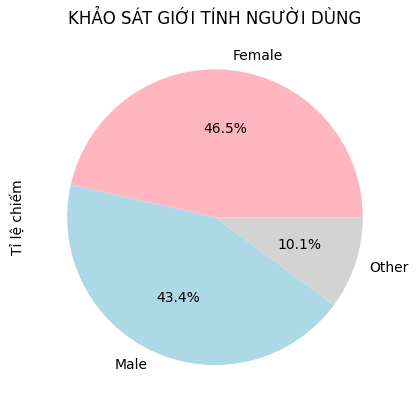

In [ ]:
gender_count.plot.pie(autopct='%1.1f%%', colors = ["#FFB6C1", "#ADD8E6", "#D3D3D3"])
plt.title("KHẢO SÁT GIỚI TÍNH NGƯỜI DÙNG")
plt.ylabel("Tỉ lệ chiếm")

Biểu đồ cho thấy đa số khách hàng là nữ (chiếm 46,5% trên tổng số người dùng) trong khi đó người dùng nam chiếm ít hơn đôi chút (chiếm 43,4% trên tổng số người dùng). Ngoài ra, một số lượng lớn người dùng vẫn chưa khảo sát được giới tính (chiếm 10,1% trên tổng số người dùng).

b. Độ tuổi trung bình của người dùng là bao nhiêu? Độ tuổi nào phổ biến nhất?

In [ ]:
ages = df["Age"]
round(ages.mean())

38

Độ tuổi trung bình của người dùng là 38 tuổi.

In [ ]:
ages.value_counts(ascending = False).head(5)

Age
28    93
41    87
54    84
38    83
23    82
Name: count, dtype: int64

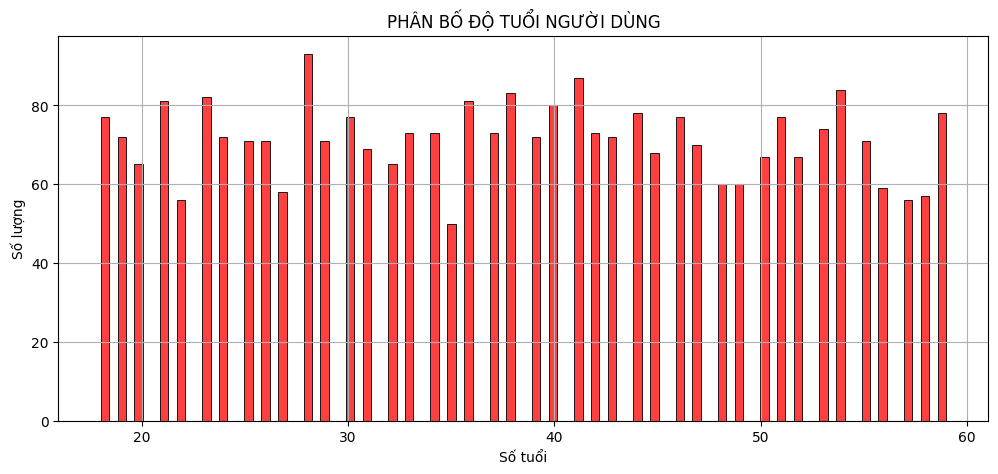

In [ ]:
plt.figure(figsize = (12, 5))
sb.histplot(df["Age"], bins = 100, color = "red")
plt.title("PHÂN BỐ ĐỘ TUỔI NGƯỜI DÙNG")
plt.xlabel("Số tuổi")
plt.ylabel("Số lượng")
plt.grid(True)
plt.show()

Độ tuổi phổ biến nhất của người dùng là 28 tuổi. Ngoài ra, ở độ tuổi 41 và 54 cũng có số lượng người dùng nhiều không kém.

c. Sản phẩm thời trang nào được đánh giá nhiều nhất? Thương hiệu nào được đề cập nhiều nhất?

In [ ]:
df["Fashion_Item"].value_counts().head(5)

Fashion_Item
Jeans      512
Jacket     510
Bag        505
Dress      498
T-shirt    494
Name: count, dtype: int64

Hai sản phẩm thời trang được đánh giá nhiều nhất là quần jeans và áo jacket với số lượng đánh giá lần lượt là 512 và 510. Theo sau đó là các sản phẩm như túi, đầm hay áo thun với lượt mua cũng nhiều không xuể (lần lượt là 505, 498 và 494 lượt mua).

In [ ]:
brand_trendy = df.groupby("Brand")["Trendy_Score"].mean().sort_values(ascending = False)
round(brand_trendy.head(), 2)

Brand
Uniqlo    50.68
Gucci     50.65
Adidas    50.55
Zara      49.96
Nike      49.76
Name: Trendy_Score, dtype: float64

Text(0, 0.5, 'Điểm trendy (trên thang 100)')

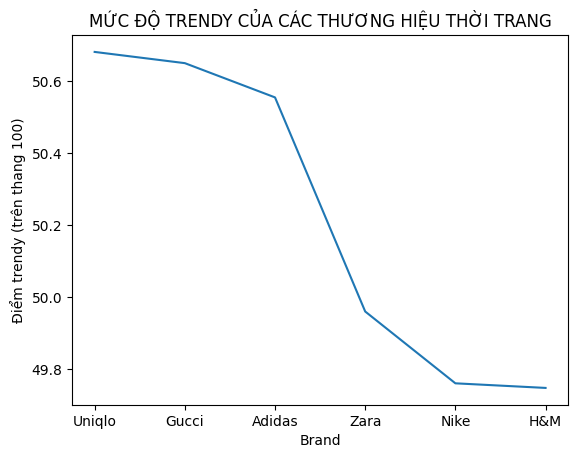

In [ ]:
brand_trendy.plot()
plt.title("MỨC ĐỘ TRENDY CỦA CÁC THƯƠNG HIỆU THỜI TRANG")
plt.ylabel("Điểm trendy (trên thang 100)")

d. Phân bố giá sản phẩm như thế nào? Có nhiều sản phẩm giá cao không?

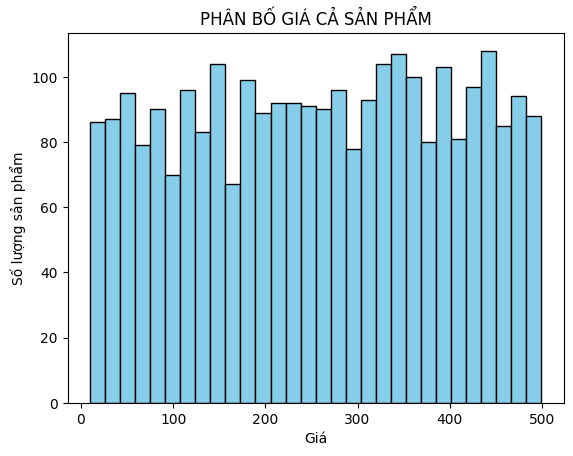

np.float64(259.0)

In [ ]:
plt.hist(df["Price"], bins = 30, color = "skyblue", edgecolor = "black")
plt.title("PHÂN BỐ GIÁ CẢ SẢN PHẨM")
plt.xlabel("Giá")
plt.ylabel("Số lượng sản phẩm")
plt.show()
avr_price = round(df["Price"].mean(), 0)
avr_price

Giá cả phân bố đều ở khoảng 200 - 300, ngược lại ở khoảng 0 - 200 và 300 - 500 thì giá cả phân bố không đồng đều, lúc cao lúc thấp. Nhưng nhìn chung, vẫn có rất nhiều mặt hàng với giá cao, nhất là từ 300 - 400.

2. Phân tích theo cảm xúc và đánh giá

a. Trung bình điểm đánh giá (Rating) của từng thương hiệu là bao nhiêu?

/var/folders/dq/jjhg1nlj04ncjfxk4lff2kv00000gn/T/ipykernel_10069/613562426.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x = brand.index, y = brand.values, palette = "Reds_r")


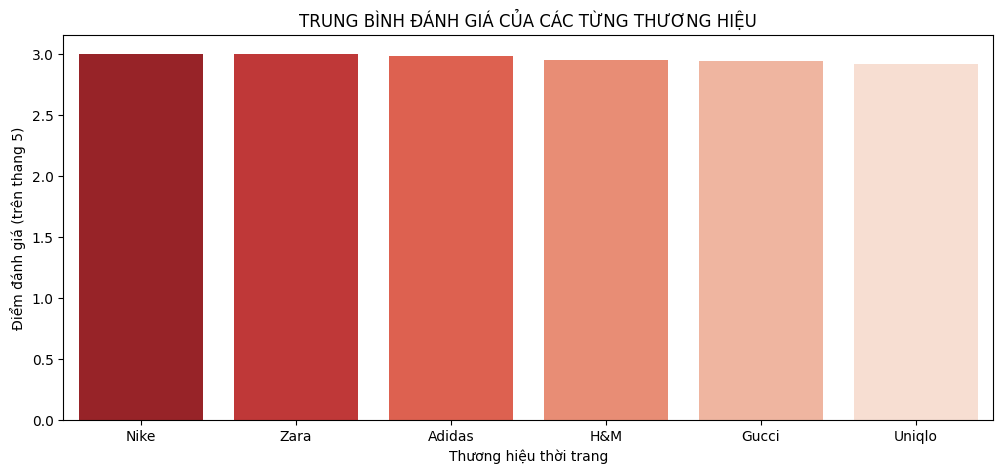

In [ ]:
brand = df.groupby("Brand")["Rating"].mean().sort_values(ascending = False)

plt.figure(figsize = (12, 5))
sb.barplot(x = brand.index, y = brand.values, palette = "Reds_r")
plt.title("TRUNG BÌNH ĐÁNH GIÁ CỦA CÁC TỪNG THƯƠNG HIỆU")
plt.xlabel("Thương hiệu thời trang")
plt.ylabel("Điểm đánh giá (trên thang 5)")
plt.show()

Điểm trung bình của các thương hiệu sấp xỉ 3, trong Nike có điểm cao nhất và Uniqlo có điểm thấp nhất.

b. Những sản phẩm nào có đánh giá tốt nhất (Rating trung bình cao nhất)?

Text(0, 0.5, 'Điểm đánh giá (trên thang 5)')

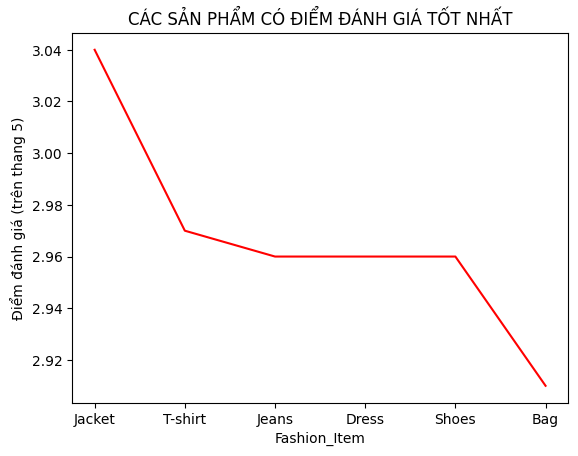

In [ ]:
item = round(df.groupby("Fashion_Item")["Rating"].mean(), 2).sort_values(ascending = False)
item.plot(color = "red")
plt.title("CÁC SẢN PHẨM CÓ ĐIỂM ĐÁNH GIÁ TỐT NHẤT")
plt.ylabel("Điểm đánh giá (trên thang 5)")

Nhìn sơ đồ ta có thể thấy được Jacket có điểm đánh giá rating trung bình tốt nhất (3.04) còn các sản phẩm còn lại đều dưới 3.

c. Những sản phẩm nào có nhiều đánh giá tiêu cực nhất? Có mối liên hệ nào giữa Sentiment và Rating không?

In [ ]:
negative = df[df["Sentiment"] == "Negative"]
item_negative = negative.groupby("Fashion_Item").count().iloc[:, :1]
item_negative

,User_ID
Fashion_Item,
Bag,112
Dress,101
Jacket,110
Jeans,107
Shoes,97
T-shirt,92


Nhìn vào bảng ta thấy được sản phẩm Bag có nhiều đánh giá tiêu cực nhất (112).

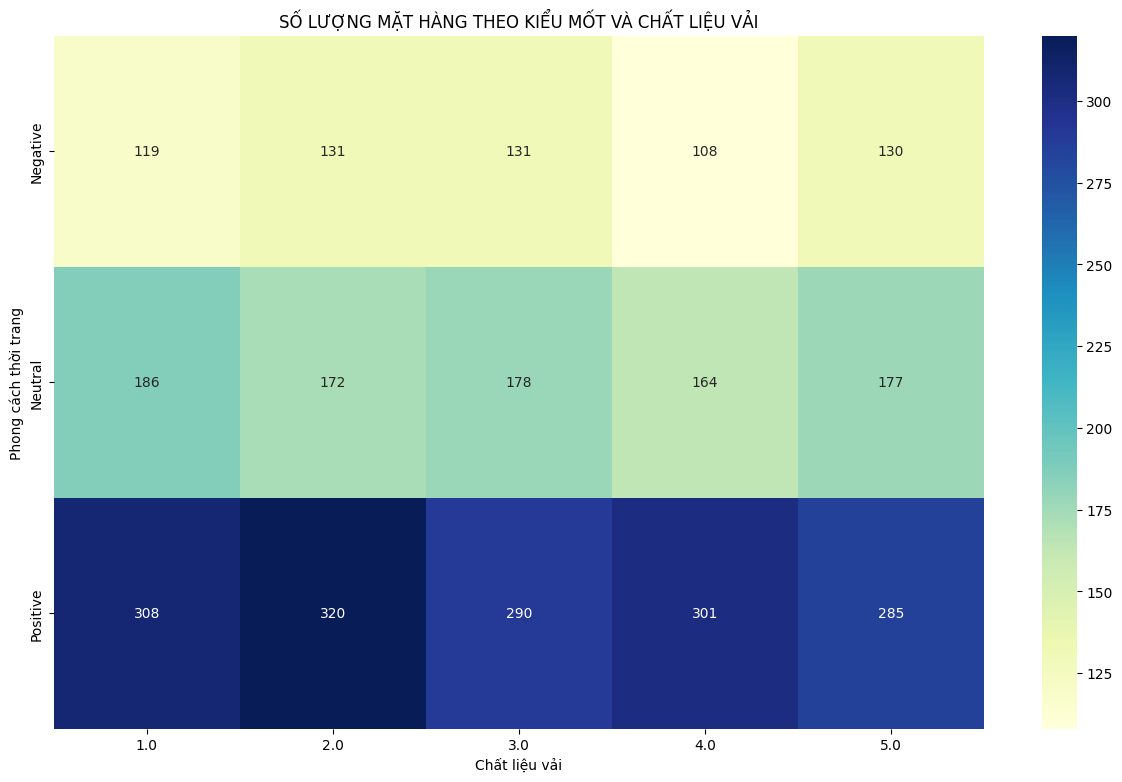

In [ ]:
sentiment_rating = df.groupby(["Sentiment", "Rating"]).count()
sentiment_rating = sentiment_rating.reset_index().iloc[:, :3]
sentiment_rating = sentiment_rating.rename(columns={"User_ID": "count"})
sentiment_rating = sentiment_rating.groupby(["Sentiment", "Rating"])["count"].sum().unstack()

plt.figure(figsize=(15, 9))
sb.heatmap(sentiment_rating, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("SỐ LƯỢNG MẶT HÀNG THEO KIỂU MỐT VÀ CHẤT LIỆU VẢI")
plt.ylabel('Phong cách thời trang')
plt.xlabel('Chất liệu vải')
plt.show()

3. Phân tích xu hướng thời gian

a. Xu hướng đánh giá sản phẩm có thay đổi theo năm không?

In [ ]:
year = df[df["Review_Date"].dt.year == 2022]
(year["Sentiment"] == "Positive").count()

np.int64(526)

In [ ]:
years = [2020, 2021, 2022, 2023, 2024, 2025]
sentiment = ["Positive", "Neutral", "Negative"]
sentiment_cnt = []
for i in years:
    year = df[df["Review_Date"].dt.year == i]
    for j in sentiment:
        sentiment_cnt.append((year["Sentiment"] == j).count())

sentiment_cnt
#palette = ["#2A9D8F", "#E9C46A", "#E76F51"]


[np.int64(405),
 np.int64(405),
 np.int64(405),
 np.int64(530),
 np.int64(530),
 np.int64(530),
 np.int64(526),
 np.int64(526),
 np.int64(526),
 np.int64(519),
 np.int64(519),
 np.int64(519),
 np.int64(585),
 np.int64(585),
 np.int64(585),
 np.int64(129),
 np.int64(129),
 np.int64(129)]

b. Có tháng nào trong năm người dùng đánh giá nhiều hơn không?

In [ ]:
df["Month"] = df["Review_Date"].dt.month
month_cnt = df.groupby("Month").count()["User_ID"]
month_cnt

Month
1     254
2     226
3     209
4     227
5     237
6     223
7     243
8     242
9     200
10    217
11    202
12    214
Name: User_ID, dtype: int64

Nhìn qua, ta thấy được tháng có lượng người dùng nhiều nhất tập trung vào tháng 1 (254). Hoặc ở cuối giai đoạn hè, tháng 7 và tháng 8, lượng người dùng đánh giá cũng cao không kém, lần lượt là 243 và 242.

4. Phân tích hành vi mua hàng

a. Người dùng có xu hướng mua sản phẩm nào nhiều nhất? Có mối liên hệ giữa Rating và Purchase_Decision không?

b. Người dùng ở khu vực nào có tỷ lệ mua hàng cao nhất?

In [ ]:
df["Location"].nunique()

243

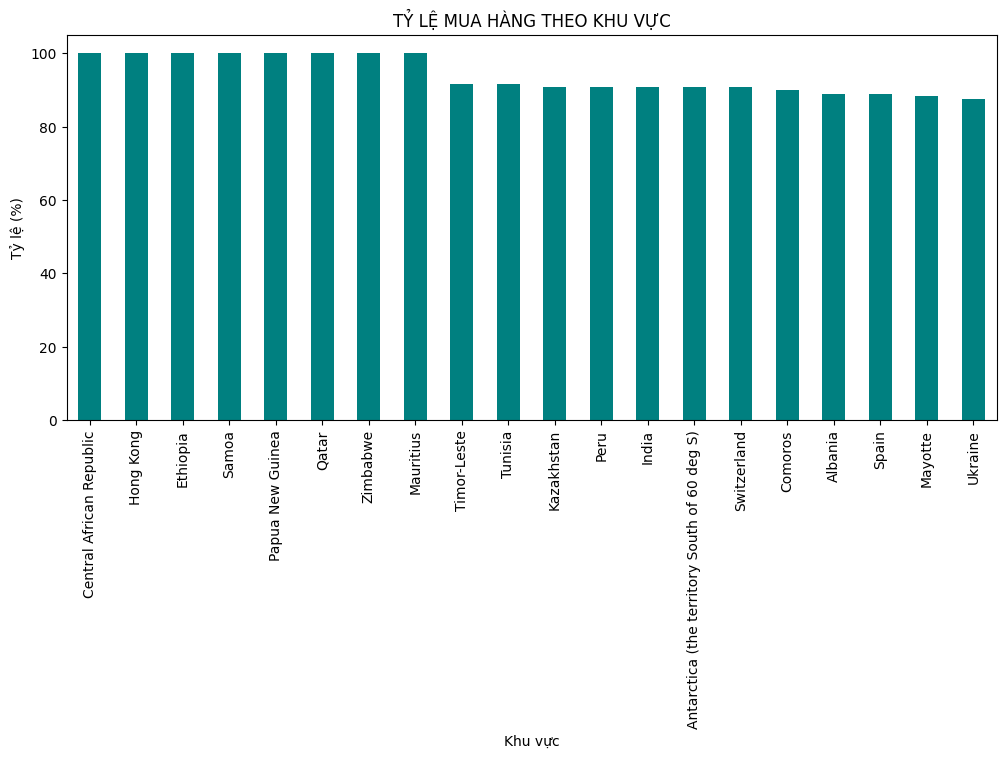

In [ ]:
total_user = df["Location"].value_counts()
purchase_user = df[df["Purchase_Decision"] == "Yes"]["Location"].value_counts()
purchase_rate = round(purchase_user / total_user * 100, 2).sort_values(ascending = False).head(20)

plt.figure(figsize = (12, 5))
purchase_rate.plot(kind = "bar", color = "teal")
plt.title("TỶ LỆ MUA HÀNG THEO KHU VỰC")
plt.xlabel("Khu vực")
plt.ylabel("Tỷ lệ (%)")
plt.show()

Các khu vực đạt tỷ lệ mua hàng 100% là: CAR, Hong Kong, Ethiopia, Samoa, PNG, Qatar, Zimbabwe, Mauritius.

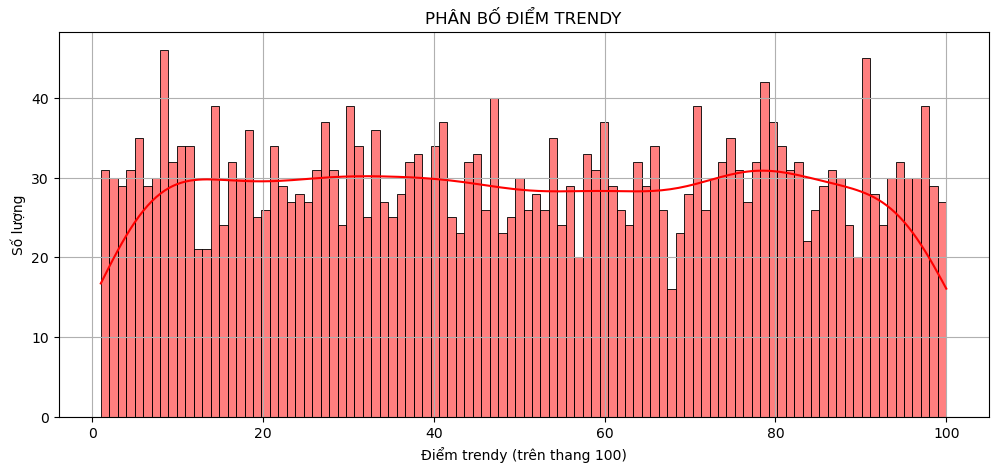

In [ ]:
plt.figure(figsize = (12, 5))
sb.histplot(df["Trendy_Score"], bins = 100, color = "red")
plt.title("PHÂN BỐ ĐIỂM TRENDY")
plt.xlabel("Điểm trendy (trên thang 100)")
plt.ylabel("Số lượng")
plt.grid(True)
plt.show()

Nhìn chung, biểu đồ phân bối đều ở mọi nơi từ 0 đến 100. Tuy nhiên nếu xét ở từng khoảng một, ví dụ từ 0 đến 20 hoặc từ 60 đến 80, ta có thể thấy các giá trị dao động mạnh, lúc cao lúc thấp, không đồng đều.

In [ ]:
highest_score = df["Trendy_Score"].max()
highest_score_count = (df["Trendy_Score"] == 100).sum()

100